<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Notebook3_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: your name here**


Prepare the data

In [5]:
import pandas
import numpy as np
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/datasets/winequality-white.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exercise #1. 
Implement mean squared error (mse) algorithm

In [103]:
def mse(actual,predicted):
    mean_squared_error = np.square(actual - predicted).mean()
    return(mean_squared_error)


# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [104]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/datasets/winequality-white.csv')


#shuffle the data - "sampling" the full set in random order
shuffled_data = wine_data.sample(frac=1, random_state=41)

#cross-validation
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]


test_data.quality.iloc[1:15]


581     5
206     7
547     6
1515    6
717     5
1082    6
840     7
416     6
1398    7
793     5
1022    5
1395    6
1060    6
1188    5
Name: quality, dtype: int64

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [105]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

for i in range(15):
  print(regression_kNN(test_data.iloc[i], train_data, 15))

5.8
5.6
6.066666666666666
6.133333333333334
5.4
5.466666666666667
5.2
5.466666666666667
6.266666666666667
5.866666666666666
5.266666666666667
5.066666666666666
5.466666666666667
6.133333333333334
5.0


In [106]:
def regressions_all_kNN(test_data,train_data,k):
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)
regressions_all_kNN(test_data, train_data, 13)

0      5.769231
1      5.769231
2      6.230769
3      6.153846
4      5.384615
         ...   
315    5.384615
316    5.538462
317    5.923077
318    5.461538
319    5.538462
Length: 320, dtype: float64

In [107]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [108]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

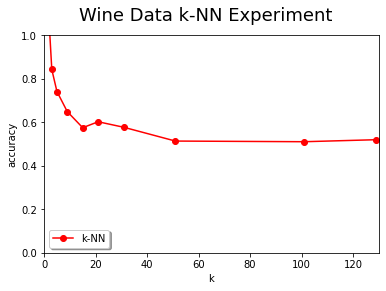

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

k_vals = [1,3,5,9,15,21,31,51,101,129] #320 rows in training set
kNN_accuracies = []

for k in k_vals:
    predictions = regressions_all_kNN(test_data,train_data,k)
    current_accuracy = mse(test_data['quality'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Wine Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

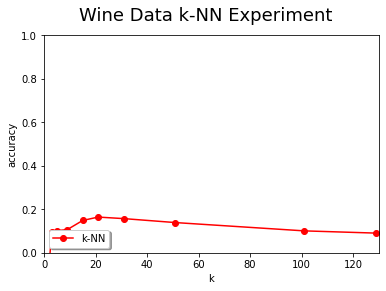

In [110]:
from sklearn.metrics import r2_score
k_vals = [1,3,5,9,15,21,31,51,101,129] #320 rows in training set
kNN_accuracies = []

for k in k_vals:
    predictions = regressions_all_kNN(test_data,train_data,k)
    current_accuracy = r2_score(test_data['quality'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Wine Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

Seeing that neither perfectly fit the data and that they have similar inverse shapes to one another. The best K is 21 for the model using R squared since that is the value that is closest to 1. As for the Mean Squared Error the best K value would be 51 since that is the value closest to 0. Becuase of these factors a k in the range of 21-51 would be best when you use either MSE or R squared. I think that becasue of this we would be best using around 50-60 for K and use MSE since it more consistant in that range where R squared begins to decrease.